In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:


#combined data is for geagraphical analysis
ge_data = pd.read_csv("EV_PCS.csv")

ge_data

,States/UTs,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of Operational Public Charging Station (PCS),Number of EV Chargers,Number of Charging Points/Vehicle Connectors
0,Andaman & Nicobar Islands,162,"1,46,945","1,47,107",3,5,5
1,Andhra Pradesh,29565,"1,47,27,558","1,47,57,123",307,348,355
2,Arunachal Pradesh,20,"2,52,965","2,52,985",9,16,16
3,Assam,64766,"46,77,053","47,41,819",52,91,91
4,Bihar,83335,"1,04,07,078","1,04,90,413",106,183,183
5,Chandigarh,2812,"7,46,881","7,49,693",9,11,17
6,Chhattisgarh,20966,"68,36,200","68,57,166",110,152,156
7,Delhi,"1,56,393","76,85,600","78,41,993",1627,2917,3247
8,Goa,3870,"10,71,570","10,75,440",55,75,90
9,Gujarat,45272,"2,06,05,484","2,06,50,756",303,490,601


In [4]:
pe_data = pd.read_csv("ev_models.csv")

pe_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [8]:
#loading the behavior/demographic dataset
de_data = pd.read_csv("Indian automoble buying behavour study.csv")

de_data.head(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [9]:
ge_data.describe()


,No. of Operational Public Charging Station (PCS),Number of EV Chargers,Number of Charging Points/Vehicle Connectors
count,32.000000,32.000000,32.000000
mean,284.750000,484.218750,539.031250
std,511.327116,832.797142,931.563842
min,2.000000,4.000000,4.000000
25%,18.750000,48.000000,48.000000
50%,112.000000,175.000000,187.500000
75%,304.000000,505.000000,607.000000
max,2494.000000,3793.000000,4211.000000


In [10]:
de_data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [13]:
# Check for missing values
print(ge_data.isnull().sum())

print(de_data.isnull().sum())

States/UTs                                          0
Total Electric Vehicle                              0
Total Non-Electric Vehicle                          0
Total                                               0
No. of Operational Public Charging Station (PCS)    0
Number of EV Chargers                               0
Number of Charging Points/Vehicle Connectors        0
dtype: int64
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64


In [26]:
ge_sorted = ge_data.sort_values(by='Total Electric Vehicle', ascending=False)

In [28]:
ge_sorted.head()

,States/UTs,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of Operational Public Charging Station (PCS),Number of EV Chargers,Number of Charging Points/Vehicle Connectors
28,Tripura,9262,"6,50,026","6,59,288",18,33,33
4,Bihar,83335,"1,04,07,078","1,04,90,413",106,183,183
26,Tamil Nadu,82051,"2,98,42,376","2,99,24,427",459,1152,1320
24,Rajasthan,81338,"1,73,27,388","1,74,08,726",373,615,629
3,Assam,64766,"46,77,053","47,41,819",52,91,91


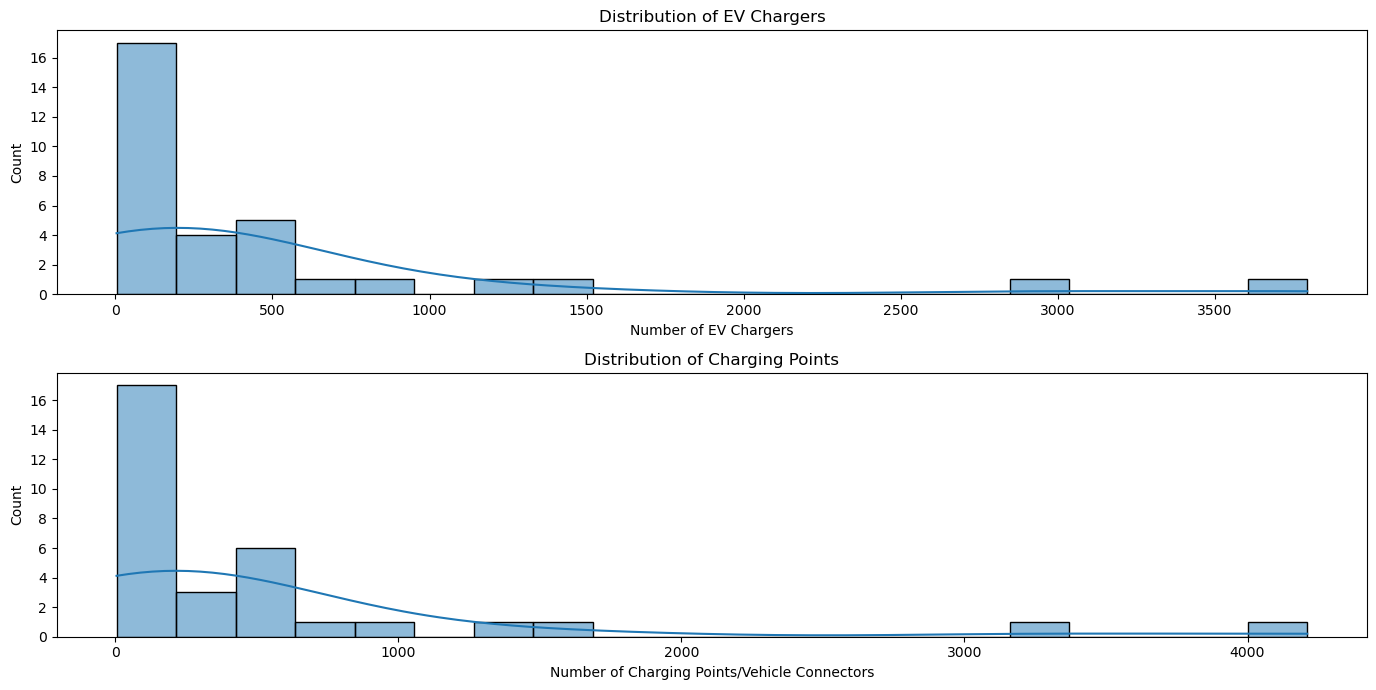

In [19]:
plt.figure(figsize=(14, 7))

# Distribution of EV Chargers
plt.subplot(2, 1, 1)
sns.histplot(ge_data['Number of EV Chargers'], bins=20, kde=True)
plt.title('Distribution of EV Chargers')

# Distribution of Charging Points
plt.subplot(2, 1, 2)
sns.histplot(ge_data['Number of Charging Points/Vehicle Connectors'], bins=20, kde=True)
plt.title('Distribution of Charging Points')

plt.tight_layout()
plt.show()

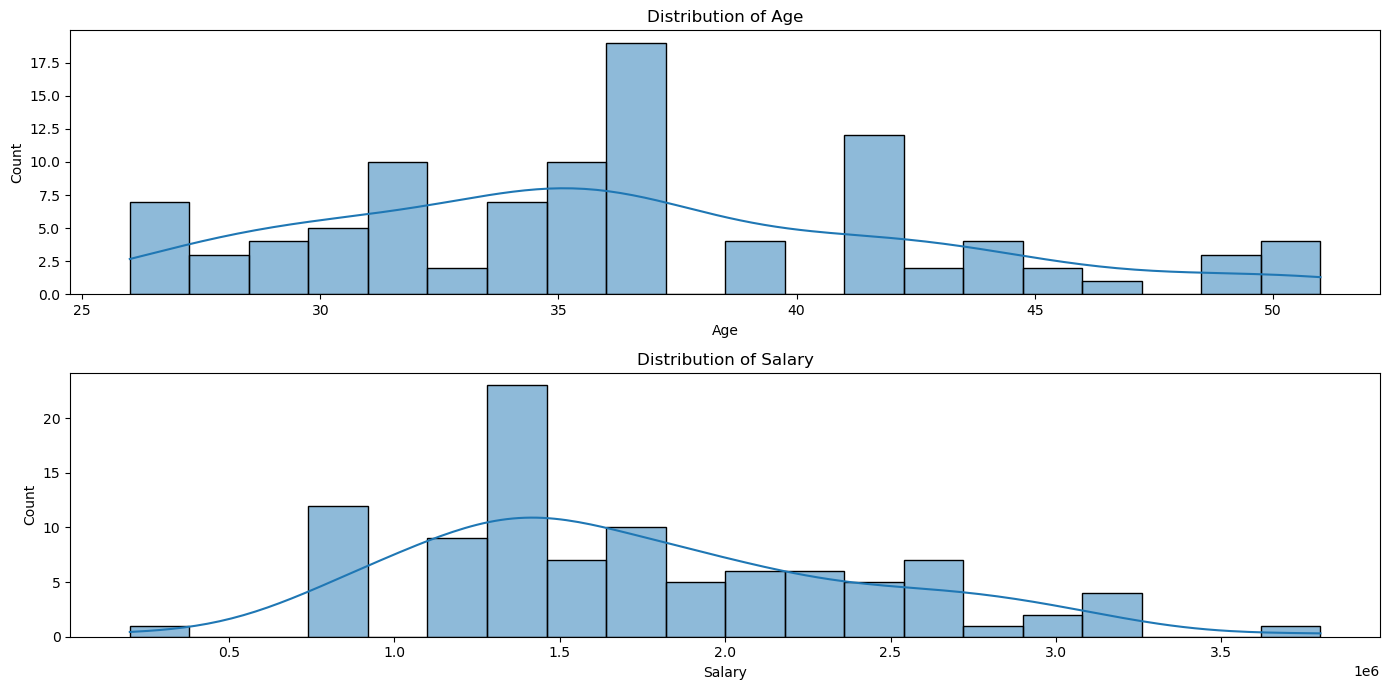

In [47]:
plt.figure(figsize=(14, 7))

# Distribution of Age
plt.subplot(2, 1, 1)
sns.histplot(de_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Salary
plt.subplot(2, 1, 2)
sns.histplot(de_data['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()

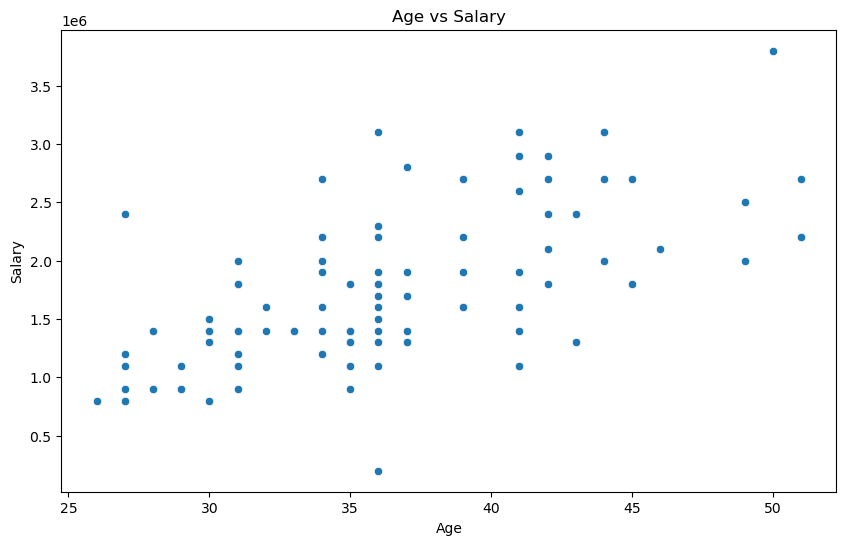

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=de_data)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

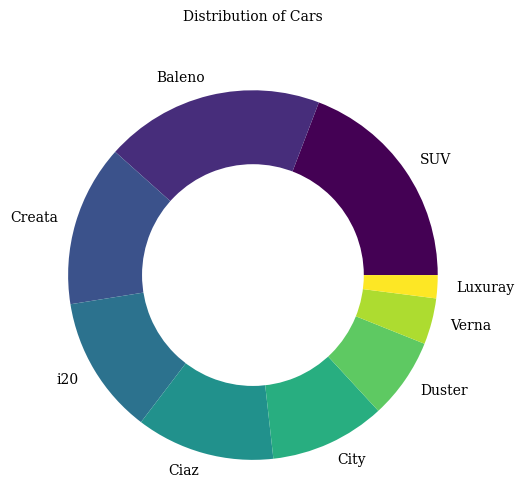

In [49]:
car_make_counts = de_data['Make'].value_counts()

plt.figure(figsize=(3, 3))  # Adjust the figure size as needed
car_make_counts.plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Distribution of Cars', family='serif', size=10, pad=100)
plt.ylabel('')
plt.show()

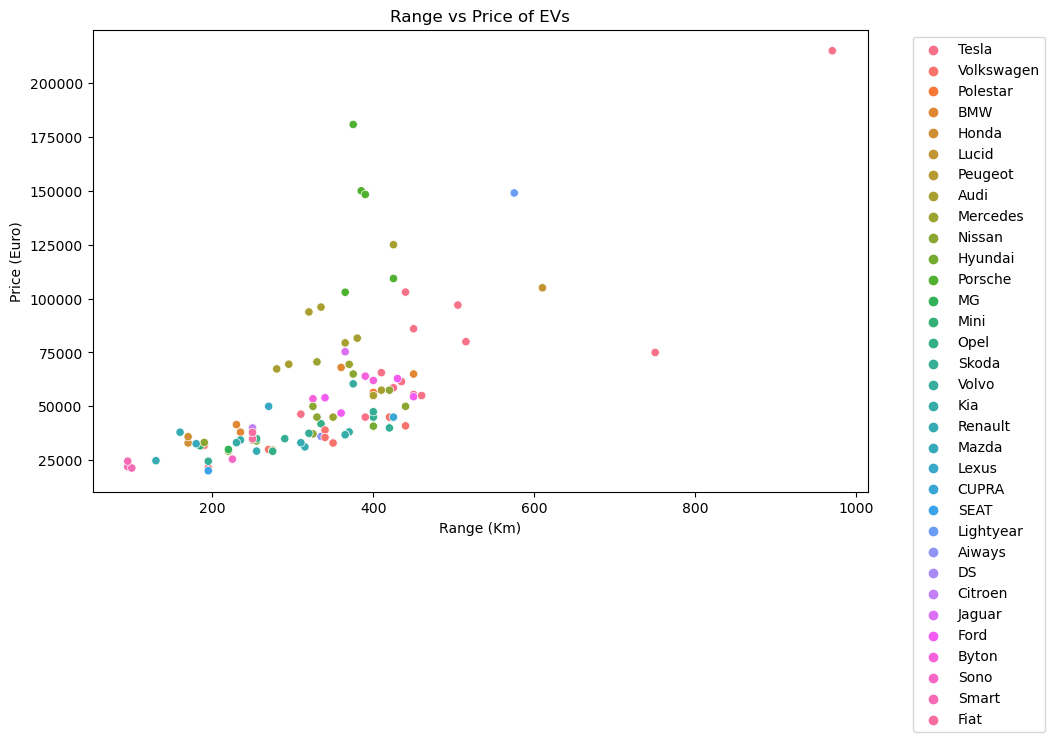

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Range_Km', y='PriceEuro', hue='Brand', data=pe_data)
plt.title('Range vs Price of EVs')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\LASYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LASYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LASYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LASYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

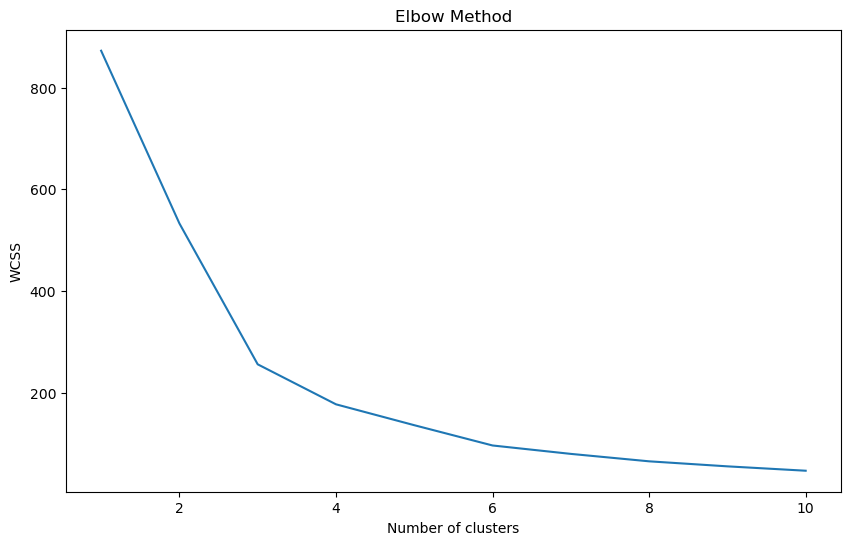

C:\Users\LASYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


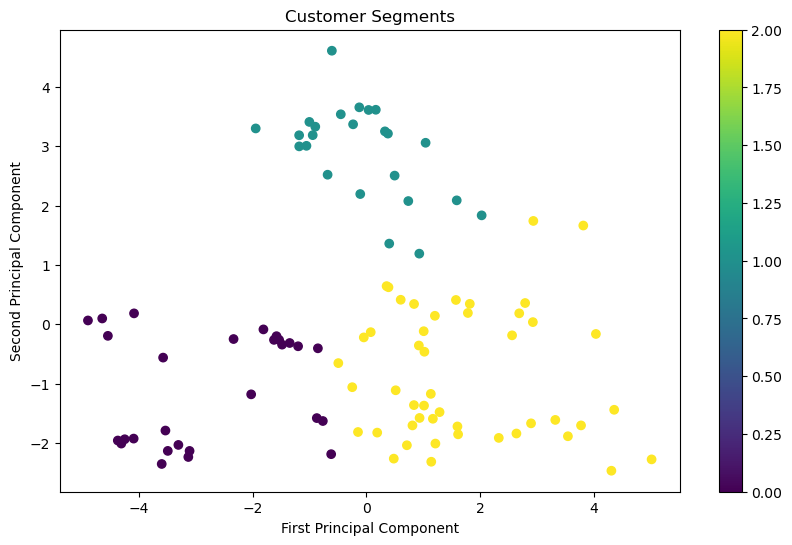

The average silhouette score is: 0.4901934888695262


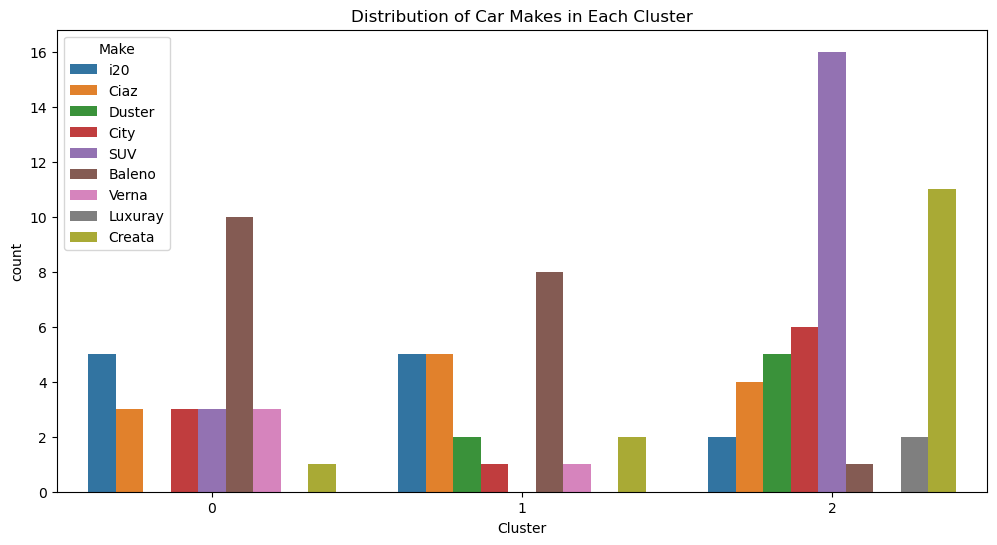

In [51]:
numeric_features = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
categorical_features = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']


X_numeric = de_data[numeric_features]
X_categorical = pd.get_dummies(de_data[categorical_features])

X = pd.concat([X_numeric, X_categorical], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Choose the optimal number of clusters (let's say it's 4, but adjust based on the elbow curve)
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)
de_data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()
# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg}")

# Visualize the distribution of car makes in each cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Make', data=de_data)
plt.title('Distribution of Car Makes in Each Cluster')
plt.show()